In [1]:
import h5py
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Read Data**

In [2]:
file = h5py.File("da1dog.h5", 'r+')
print(file.keys())

<KeysViewHDF5 ['x', 'y']>


# **Train, test split**

In [3]:
from sklearn.model_selection import train_test_split


data = np.array(file['/x'])
target = np.array(file['/y'])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))
print("Shape of testing set: {}".format(y_train.shape))
print("Shape of testing set: {}".format(y_test.shape))

Shape of training set: (11200, 10000)
Shape of testing set: (2800, 10000)
Shape of testing set: (11200,)
Shape of testing set: (2800,)


# **PCA**

In [6]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')
        
H=100
W=100

#Fine the mean_images
mean_image=np.mean(X_train, axis=0)

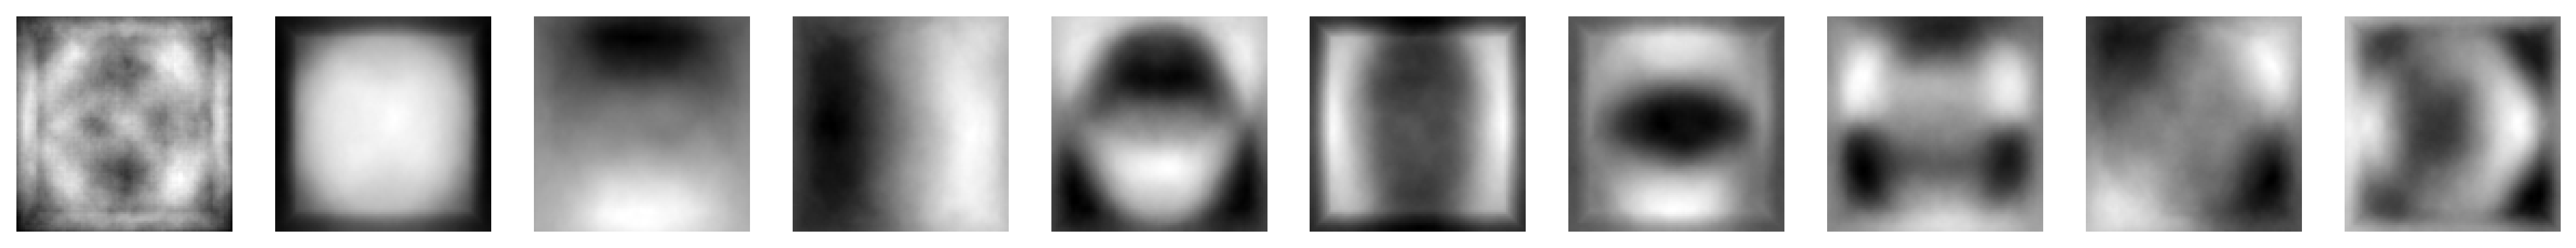

In [7]:
from sklearn.decomposition import PCA
n_components = 10

# Extracting the top 40 eigenfaces from the dataset
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

# Showing the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:], H, W)
plt.show()

eigenfaces = eigenfaces.reshape((n_components, H, W))

In [8]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# **Random Forest**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [10]:
rf0 = RandomForestClassifier()
rf0.fit(X_train, y_train)
pred = rf0.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred)))

Accuracy score (testing): 0.860


## **n_estimators**

In [11]:
lista = [10,50,100,200,300,500,700,1000,1200,1500,2000]
for p in lista:
    rf = RandomForestClassifier(n_estimators = p)
    rf.fit(X_train, y_train)
    print("parameter : ", p)
    pred = rf.predict(X_test)
    print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred)))

parameter :  10
Accuracy score (testing): 0.799
parameter :  50
Accuracy score (testing): 0.856
parameter :  100
Accuracy score (testing): 0.858
parameter :  200
Accuracy score (testing): 0.858
parameter :  300
Accuracy score (testing): 0.864
parameter :  500
Accuracy score (testing): 0.862
parameter :  700
Accuracy score (testing): 0.860
parameter :  1000
Accuracy score (testing): 0.863
parameter :  1200
Accuracy score (testing): 0.864
parameter :  1500
Accuracy score (testing): 0.866
parameter :  2000
Accuracy score (testing): 0.864


## **max_features, n_estimators = 1500**

In [13]:
rf1 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001)
rf1.fit(X_train, y_train)
pred1 = rf1.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred1)))

Accuracy score (testing): 0.881


In [14]:
rf2 = RandomForestClassifier(n_estimators = 1500,max_features = 0.01)
rf2.fit(X_train, y_train)
pred2 = rf2.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred2)))

Accuracy score (testing): 0.878


In [15]:
rf3 = RandomForestClassifier(n_estimators = 1500,max_features = 0.1)
rf3.fit(X_train, y_train)
pred3 = rf3.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred3)))

Accuracy score (testing): 0.879


In [16]:
rf4 = RandomForestClassifier(n_estimators = 1500,max_features = 0.5)
rf4.fit(X_train, y_train)
pred4 = rf4.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred4)))

Accuracy score (testing): 0.857


In [17]:
rf5 = RandomForestClassifier(n_estimators = 1500,max_features = 1)
rf5.fit(X_train, y_train)
pred5 = rf5.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred5)))

Accuracy score (testing): 0.877


In [18]:
rf6 = RandomForestClassifier(n_estimators = 1500,max_features = 2)
rf6.fit(X_train, y_train)
pred6 = rf6.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred6)))

Accuracy score (testing): 0.869


In [19]:
rf7 = RandomForestClassifier(n_estimators = 1500,max_features = 3)
rf7.fit(X_train, y_train)
pred7 = rf7.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred7)))

Accuracy score (testing): 0.861


## **criterion, n_estimators = 1500, max_features = 0.001**

In [20]:
rf8 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001, criterion = "entropy")
rf8.fit(X_train, y_train)
pred8 = rf8.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred8)))

Accuracy score (testing): 0.877


In [21]:
rf9 = RandomForestClassifier(n_estimators = 1500,max_features =0.001, criterion = "gini")
rf9.fit(X_train, y_train)
pred9 = rf9.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred9)))

Accuracy score (testing): 0.880


## **min_samples_split, n_estimators = 1500, max_features=0.001, criterion="gini"**

In [22]:
rf10 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001,criterion = "gini", min_samples_split = 3)
rf10.fit(X_train, y_train)
pred10 = rf10.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred10)))

Accuracy score (testing): 0.875


In [23]:
rf11 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001,criterion = "gini", min_samples_split = 5)
rf11.fit(X_train, y_train)
pred11 = rf11.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred11)))

Accuracy score (testing): 0.860


In [24]:
rf12 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001,criterion = "gini", min_samples_split = 7)
rf12.fit(X_train, y_train)
pred12 = rf12.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred12)))

Accuracy score (testing): 0.848


In [25]:
rf13 = RandomForestClassifier(n_estimators = 1500,max_features = 0.001,criterion = "gini", min_samples_split =10 )
rf13.fit(X_train, y_train)
pred13 = rf13.predict(X_test)
print("Accuracy score (testing): {0:.3f}".format(accuracy_score(y_test, pred13)))

Accuracy score (testing): 0.830


## **Evaluation on highest accuracy where n_estimators = 1500 and max_features = 0.001**

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred1,labels=rf1.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       396
           1       0.88      0.88      0.88       425
           2       0.86      0.88      0.87       408
           3       0.89      0.92      0.90       399
           4       0.86      0.85      0.86       388
           5       0.89      0.92      0.91       392
           6       0.85      0.89      0.87       392

    accuracy                           0.88      2800
   macro avg       0.88      0.88      0.88      2800
weighted avg       0.88      0.88      0.88      2800



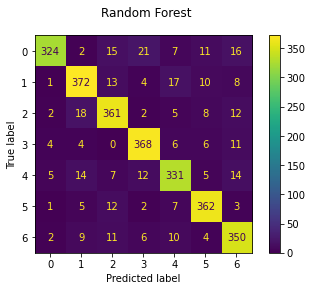

In [27]:
fig = plot_confusion_matrix(rf1,X_test, y_test, display_labels=rf1.classes_)
fig.figure_.suptitle("Random Forest")
plt.show()